Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and processing

In [2]:
# loading the csv data to a pandas dataframe
gold_data = pd.read_csv('/content/gold_price_data.csv')

In [3]:
# print first five rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01/02/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,01/03/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,01/04/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,01/07/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,01/08/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# print the last five rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,05/08/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,05/09/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,05/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [6]:
# getting some information about data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# checking number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [8]:
# statistical measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [9]:
correlation = gold_data.corr

In [10]:
# constructing a heatmap tp understand the correlation
#plt.figure(figsize = (8,8))
#sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap ='Blues')

In [11]:
# correlation values of GLD
#print(correlation['GLD'])

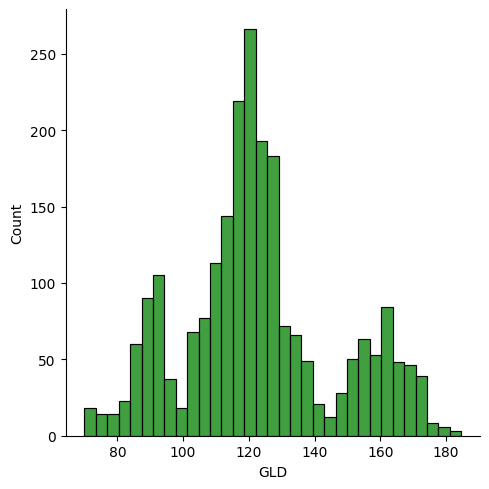

In [12]:
# checking the distribution of the GLD price
sns.displot(gold_data['GLD'], color='green')

Splitting the features and target

In [13]:
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']

In [14]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [15]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training and Test Data

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

Model Training:
Random Forest Regressor

In [17]:
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
# training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [19]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [20]:
print(test_data_prediction)

[168.3922991   82.13029986 116.10110024 127.57400051 120.80520133
 154.88719753 150.11749857 126.16000039 117.48869869 125.94740105
 116.77440069 171.36540118 140.92419808 167.87649812 115.20789997
 117.84320059 137.42370315 170.01830056 159.32370278 159.04319893
 155.03839973 125.41440009 175.82219978 157.38850236 125.26190031
  93.87059981  77.79110003 120.40990021 119.06399929 167.41049988
  88.02840055 125.19729989  91.19840111 117.66850018 121.16069923
 136.41340012 115.47670129 114.70630093 147.7710994  107.170901
 104.23350232  87.11839785 126.43960036 118.15870025 153.74689849
 119.67469995 108.34369979 108.02959854  93.15490076 127.21779749
  74.40420063 113.59859915 121.46670011 111.35089954 118.81299883
 120.75809955 158.47260034 168.52290099 147.06459684  85.76089839
  94.24420023  86.836699    90.79829991 118.9517008  126.42600067
 127.57130041 170.84189955 122.32039925 117.33019915  98.32290031
 167.24400072 143.19589834 132.16850263 121.15230233 121.26489968
 119.7786004

In [21]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R squared error:', error_score)

R squared error: 0.9888810517315705


Compare the actual values and predicted values in a plot

In [22]:
Y_test = list(Y_test)

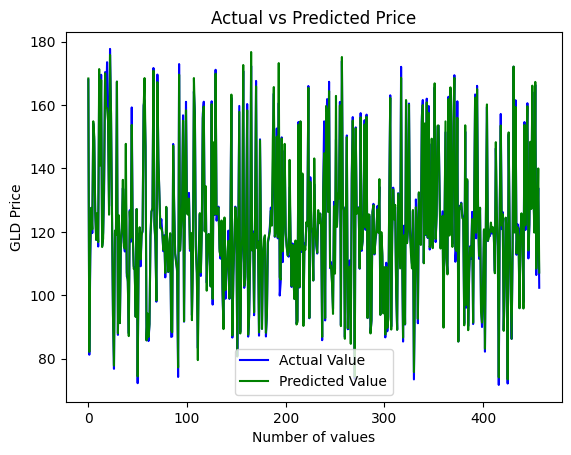

In [23]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()